# Creating a cluster model on Penguins dataset

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("dark")
from sklearn.cluster import KMeans

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


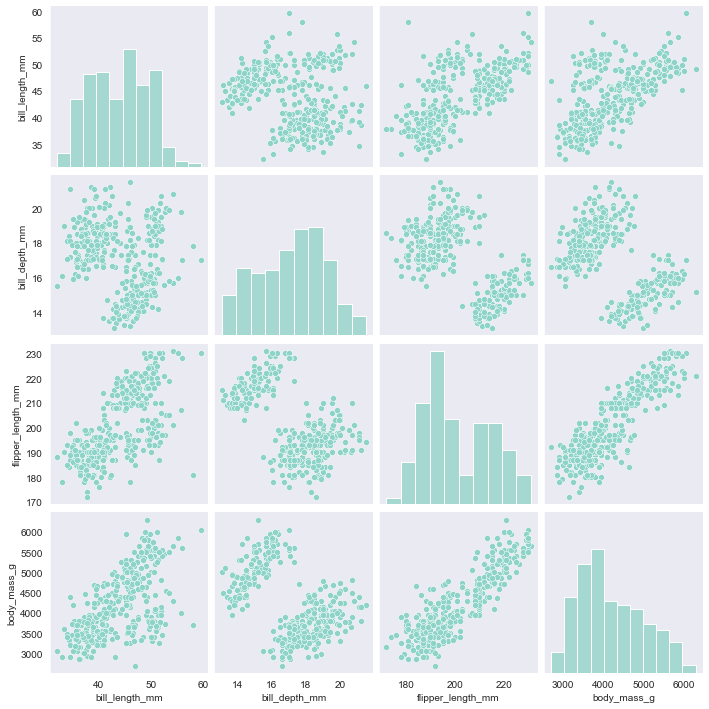

In [3]:
sns.pairplot(penguins)

I see 2 to maybe 3 clusters

In [4]:
penguins = penguins.dropna()
features = ['body_mass_g','bill_depth_mm'] # , 'flipper_length_mm'
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

Features do not really influence the silhouette score, upping the amount of clusters to 3 significantly decreases the score

In [5]:
penguins['cluster'] = km.predict(penguins[features])

C:\Users\Stijn\AppData\Local\Temp/ipykernel_5768/1567450945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['cluster'] = km.predict(penguins[features])


In [6]:
penguins.cluster.value_counts()

1    203
0    130
Name: cluster, dtype: int64

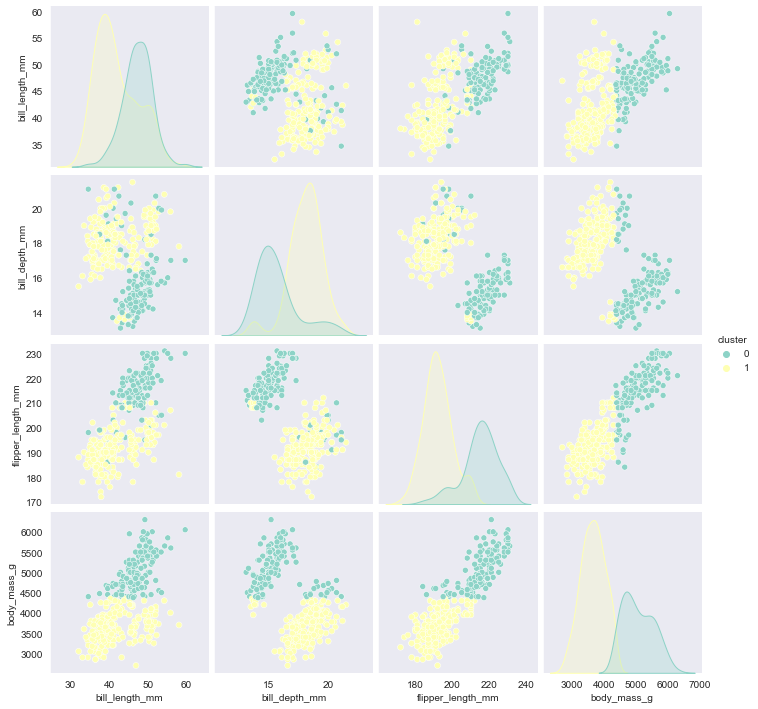

In [7]:
sns.pairplot(penguins, hue="cluster")

# Evaluating the clustering

In [8]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [9]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6310839036540167

In [10]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,14,132
Chinstrap,5,63
Gentoo,111,8
